In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
import geoplot as gplt

In [ ]:
results_2019 = pd.read_csv("../data/bac-results-2019.csv", index_col=0)
results_2020 = pd.read_csv("../data/bac-results-2020.csv", index_col=0)
results_2021 = pd.read_csv("../data/bac-results-2021.csv", index_col=0)
results_2019.fillna('', inplace=True)
results_2020.fillna('', inplace=True)
results_2021.fillna('', inplace=True)
print()

In [54]:
# In the table only those student have their final grade computed who passed the exam.
# Let's compute the final grade for everyone who did not get disqualified at an exam and attended all their exams.
# Also compute the average of the mandatory and the elective subjects.
# Also, the percentage of those who successfully took the final exam.
# Also, the percentage of students taking a native language exam.

# Separate the students who had 3 vs 4 subjects.
romanian_only_results = results_2021[(results_2021['mother_tongue'] == '') & (results_2021['romanian_written_final'] >= 1)]
romanian_plus_results = results_2021[(results_2021['mother_tongue'] != '') & (results_2021['romanian_written_final'] >= 1)]
romanian_only_results_valid = romanian_only_results[(romanian_only_results['mandatory_subject_written_final'] >= 1.0) & (romanian_only_results['elective_subject_written_final'] >= 1.0)].copy()
romanian_plus_results_valid = romanian_plus_results[(romanian_plus_results['mandatory_subject_written_final'] >= 1.0) & (romanian_plus_results['elective_subject_written_final'] >= 1.0) & (romanian_plus_results['mother_tongue_written_final'] >= 1.0)].copy()

subjects = ['romanian_written_final', 'mandatory_subject_written_final', 'elective_subject_written_final']
romanian_only_results_valid.loc[:, 'written_average'] = romanian_only_results_valid[subjects].mean(axis=1)
romanian_plus_results_valid.loc[:, 'written_average'] = romanian_plus_results_valid[subjects + ['mother_tongue_written_final']].mean(axis=1)
romanian_only_results_valid.loc[:, 'mandatory_elective_average'] = romanian_only_results_valid[['mandatory_subject_written_final', 'elective_subject_written_final']].mean(axis=1)
romanian_plus_results_valid.loc[:, 'mandatory_elective_average'] = romanian_plus_results_valid[['mandatory_subject_written_final', 'elective_subject_written_final']].mean(axis=1)

results_2021_valid = pd.concat([romanian_only_results_valid, romanian_plus_results_valid])
#results_2021_counties = results_2021_valid.groupby('county', as_index=False)[['written_average', 'mandatory_elective_average']].mean()
results_2021_counties = results_2021_valid.groupby('county', as_index=False).agg({'written_average': ['mean'], 'mandatory_elective_average': ['mean'], 'successful': [lambda value: value.str.count('REUSIT').sum() / value.count()], 'mother_tongue': [lambda value: (value != '').sum() / value.count()]}, as_index=False)
results_2021_counties.columns = results_2021_counties.columns.get_level_values(0)
results_2021_counties.head()

,county,written_average,mandatory_elective_average,successful,mother_tongue
0,AB,7.236060,7.277869,0.752901,0.032230
1,AG,7.027790,7.074932,0.718333,0.000000
2,AR,6.819016,6.692272,0.655318,0.035195
3,B,7.305344,7.275889,0.744330,0.006791
4,BC,7.363606,7.364089,0.780713,0.000000


In [55]:
ro_map = gpd.read_file("../data/ro_judete_poligon.geojson")

<AxesSubplot:>

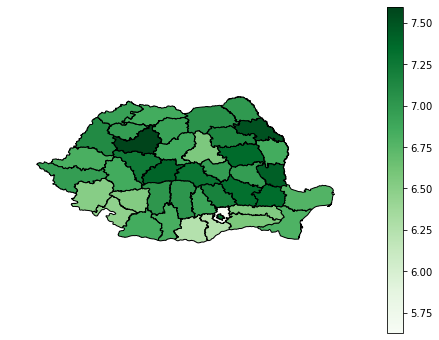

In [56]:
# Display the average grade by county on the mapof Ro.
# Map source: http://geo-spatial.org/vechi/download/romania-seturi-vectoriale

ro_map = ro_map.merge(results_2021_counties, left_on="mnemonic", right_on="county")
gplt.choropleth(ro_map, hue='written_average', cmap='Greens', legend=True)

<AxesSubplot:>

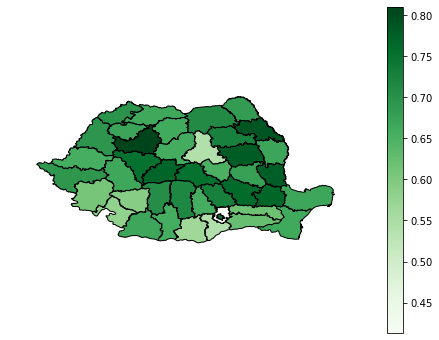

In [57]:
# Display the proportion of students who passed the exam.

gplt.choropleth(ro_map, hue='successful', cmap='Greens', legend=True)

<AxesSubplot:>

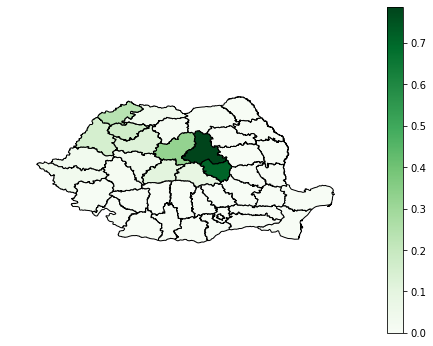

In [58]:
# Display the proportion of minorities in each county.
# Note that only the students who did attend the exam and did not get disqualified are counted.

gplt.choropleth(ro_map, hue='mother_tongue', cmap='Greens', legend=True)

<AxesSubplot:>

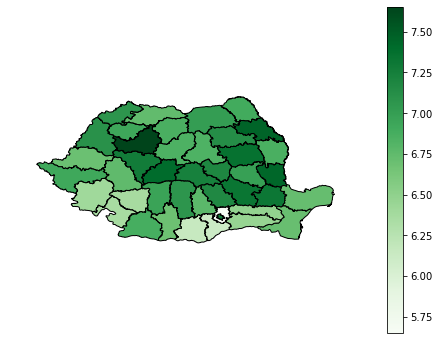

In [60]:
# Display the average mandatory and elective grades.

gplt.choropleth(ro_map, hue='mandatory_elective_average', cmap='Greens', legend=True)